In [42]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [6]:
df = pd.read_csv("Bing-COVID19-Data.csv")#, nrows=1000)

In [7]:
df.head()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
0,338995,01/21/2020,262,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
1,338996,01/22/2020,313,51.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
2,338997,01/23/2020,578,265.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
3,338998,01/24/2020,841,263.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
4,338999,01/25/2020,1320,479.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN


In [32]:
df[df.ISO2.notnull()].sort_values(by='Updated')

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
350641,119484,01/21/2020,0,NaN,NaN,NaN,NaN,NaN,17.73293,-64.76649,VI,VIR,U.S. Virgin Islands,NaN,NaN
944300,115744,01/21/2020,0,NaN,NaN,NaN,NaN,NaN,35.84300,-86.34305,US,USA,United States,Tennessee,NaN
705081,72863,01/21/2020,0,NaN,NaN,NaN,NaN,NaN,38.36797,-92.47788,US,USA,United States,Missouri,NaN
684861,72175,01/21/2020,0,NaN,NaN,NaN,NaN,NaN,46.34936,-94.19837,US,USA,United States,Minnesota,NaN
784158,83377,01/21/2020,0,NaN,NaN,NaN,NaN,NaN,47.44630,-100.46940,US,USA,United States,North Dakota,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284683,89080418,11/27/2020,2047,7.0,25.0,0.0,1599.0,0.0,-43.94764,170.50290,NZ,NZL,New Zealand,NaN,NaN
498435,88770426,11/27/2020,271,0.0,13.0,0.0,NaN,NaN,32.55559,-84.24923,US,USA,United States,Georgia,Taylor County
828583,88772632,11/27/2020,179,2.0,3.0,0.0,NaN,NaN,31.91409,-108.71490,US,USA,United States,New Mexico,Hidalgo County
280979,88914881,11/27/2020,229343,1703.0,1435.0,23.0,209435.0,0.0,28.25914,83.94416,NP,NPL,Nepal,NaN,NaN


In [29]:
df['AdminRegion2'].value_counts()

Washington County      6931
Jefferson County       6025
Franklin County        5765
Lincoln County         5426
Jackson County         5393
                       ... 
Srinagar                  1
Pyrénées-Orientales       1
Pulwama                   1
Kupwara                   1
Lima                      1
Name: AdminRegion2, Length: 2772, dtype: int64

In [17]:
num_rows = df.shape[0]
num_features = df.shape[1]

In [19]:
df[df.Deaths.isnull()]['Deaths'].shape[0]

69514

In [25]:
for col in df.columns:
    empty_vals = df[df[col].isnull()][col].shape[0]
    print(f"{col} has {empty_vals} missing values ({round(empty_vals / num_rows, 4)}% missing)")

ID has 0 missing values (0.0% missing)
Updated has 0 missing values (0.0% missing)
Confirmed has 0 missing values (0.0% missing)
ConfirmedChange has 5081 missing values (0.0046% missing)
Deaths has 69514 missing values (0.0628% missing)
DeathsChange has 79690 missing values (0.072% missing)
Recovered has 698140 missing values (0.6307% missing)
RecoveredChange has 703466 missing values (0.6355% missing)
Latitude has 310 missing values (0.0003% missing)
Longitude has 310 missing values (0.0003% missing)
ISO2 has 1104 missing values (0.001% missing)
ISO3 has 849 missing values (0.0008% missing)
Country_Region has 0 missing values (0.0% missing)
AdminRegion1 has 57081 missing values (0.0516% missing)
AdminRegion2 has 228333 missing values (0.2063% missing)


In [26]:
df.dtypes

ID                   int64
Updated             object
Confirmed            int64
ConfirmedChange    float64
Deaths             float64
DeathsChange       float64
Recovered          float64
RecoveredChange    float64
Latitude           float64
Longitude          float64
ISO2                object
ISO3                object
Country_Region      object
AdminRegion1        object
AdminRegion2        object
dtype: object

In [73]:
us = df[df.ISO2 == 'US'].copy()
us['Updated'] = pd.to_datetime(us.Updated)
us.head()
#us.to_csv("us-covid-data.csv")

In [76]:
us[us.DeathsChange < 0]

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
374716,87635049,2020-11-22,23,-1.0,1.0,-1.0,NaN,NaN,57.11295,-133.00110,US,USA,United States,Alaska,Petersburg Borough
376836,87348937,2020-11-21,1036,12.0,17.0,-1.0,NaN,NaN,32.99862,-87.12643,US,USA,United States,Alabama,Bibb County
380881,69828008,2020-10-01,545,0.0,30.0,-2.0,NaN,NaN,31.73141,-86.31352,US,USA,United States,Alabama,Crenshaw County
381416,87349022,2020-11-21,2242,12.0,54.0,-1.0,NaN,NaN,31.43174,-85.61103,US,USA,United States,Alabama,Dale County
383173,84237993,2020-11-11,2281,20.0,33.0,-1.0,NaN,NaN,34.44170,-87.84389,US,USA,United States,Alabama,Franklin County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083704,87632826,2020-11-22,1078,10.0,10.0,-1.0,NaN,NaN,45.21150,-90.50126,US,USA,United States,Wisconsin,Taylor County
1093331,88720079,2020-11-26,966,19.0,15.0,-1.0,635.0,22.0,37.72635,-82.13470,US,USA,United States,West Virginia,Mingo County
1093799,88720083,2020-11-26,360,8.0,9.0,-1.0,256.0,1.0,37.56031,-80.55042,US,USA,United States,West Virginia,Monroe County
1097495,87048993,2020-11-20,116,1.0,0.0,-1.0,96.0,12.0,39.46529,-80.88488,US,USA,United States,West Virginia,Tyler County


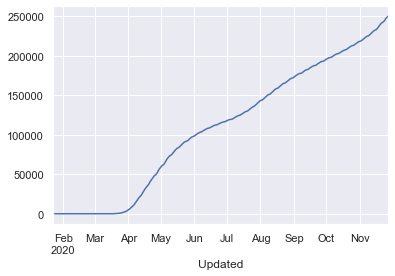

In [54]:
country = us[us.AdminRegion1.isnull()].copy()
country = country.set_index('Updated')
country['Deaths'].plot()

In [71]:
us[us.AdminRegion1.isnull()].isnull().all()

ID                 False
Updated            False
Confirmed          False
ConfirmedChange    False
Deaths             False
DeathsChange       False
Recovered          False
RecoveredChange    False
Latitude           False
Longitude          False
ISO2               False
ISO3               False
Country_Region     False
AdminRegion1        True
AdminRegion2        True
dtype: bool

In [72]:
us[us.AdminRegion2.notnull()]

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
371089,13138917,2020-05-11,1,NaN,0.0,NaN,NaN,NaN,54.90956,-162.4774,US,USA,United States,Alaska,Aleutians East Borough
371090,13599447,2020-05-12,1,0.0,0.0,0.0,NaN,NaN,54.90956,-162.4774,US,USA,United States,Alaska,Aleutians East Borough
371091,14052558,2020-05-13,1,0.0,0.0,0.0,NaN,NaN,54.90956,-162.4774,US,USA,United States,Alaska,Aleutians East Borough
371092,14482622,2020-05-14,1,0.0,0.0,0.0,NaN,NaN,54.90956,-162.4774,US,USA,United States,Alaska,Aleutians East Borough
371093,14910970,2020-05-15,1,0.0,0.0,0.0,NaN,NaN,54.90956,-162.4774,US,USA,United States,Alaska,Aleutians East Borough
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104551,87637714,2020-11-22,372,6.0,1.0,0.0,202.0,3.0,43.84049,-104.5679,US,USA,United States,Wyoming,Weston County
1104552,87909833,2020-11-23,372,0.0,0.0,-1.0,202.0,0.0,43.84049,-104.5679,US,USA,United States,Wyoming,Weston County
1104553,88194367,2020-11-24,372,0.0,1.0,1.0,211.0,9.0,43.84049,-104.5679,US,USA,United States,Wyoming,Weston County
1104554,88453406,2020-11-25,372,0.0,1.0,0.0,211.0,0.0,43.84049,-104.5679,US,USA,United States,Wyoming,Weston County
